In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Load your final preprocessed dataset
df = pd.read_csv("heart_selected_features_final.csv")
print("Dataset shape:", df.shape)
print("Columns:", df.columns.tolist())
print("Target distribution:\n", df['target'].value_counts())

X = df.drop('target', axis=1)
y = df['target']

print("Features shape:", X.shape)
print("Target shape:", y.shape)

Dataset shape: (229, 6)
Columns: ['exang', 'oldpeak', 'ca', 'thal_2', 'thal_3', 'target']
Target distribution:
 target
1    133
0     96
Name: count, dtype: int64
Features shape: (229, 5)
Target shape: (229,)


Saving heart_selected_features_final.csv to heart_selected_features_final (1).csv
Dataset shape: (229, 5)
Class distribution:
 target
1    133
0     96
Name: count, dtype: int64
Training samples: 183
Testing samples: 46

=== Decision Tree Hyperparameter Tuning ===
Fitting 5 folds for each of 90 candidates, totalling 450 fits
Best Parameters for Decision Tree: {'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 5}
Best CV Score (F1): 0.8452380952380951

=== Decision Tree Performance (Test Set) ===
Accuracy: 0.7608695652173914
Precision: 0.8333333333333334
Recall: 0.7407407407407407
F1 Score: 0.7843137254901961
ROC AUC: 0.8362573099415205

Classification Report:
              precision    recall  f1-score   support

  No Disease       0.68      0.79      0.73        19
     Disease       0.83      0.74      0.78        27

    accuracy                           0.76        46
   macro avg       0.76      0.77      0.76        46
weighted avg       0.77      

<Figure size 800x600 with 0 Axes>

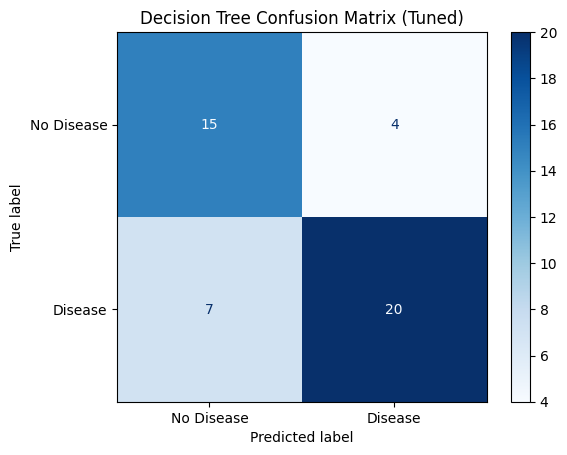

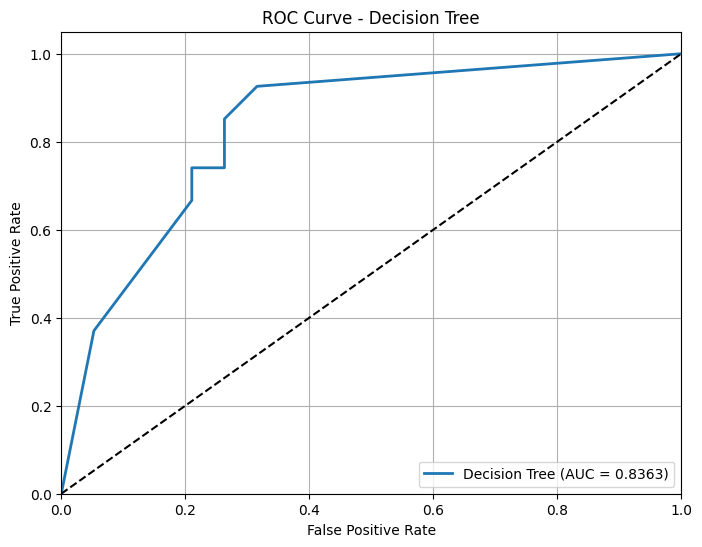

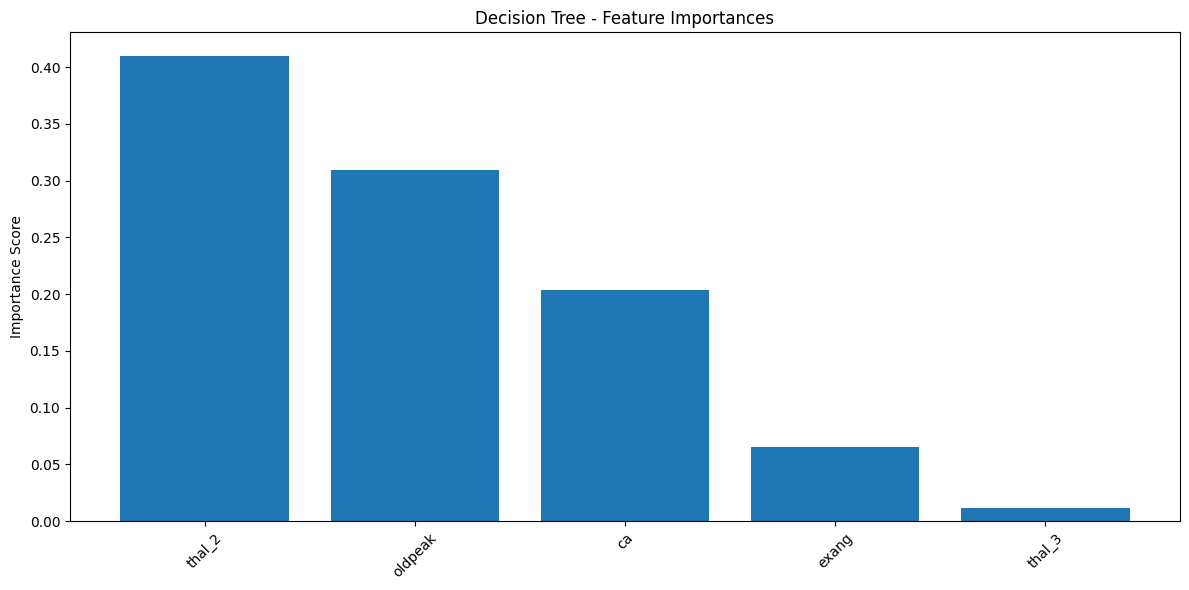


Top 5 Most Important Features:
  thal_2: 0.4101
  oldpeak: 0.3095
  ca: 0.2034
  exang: 0.0653
  thal_3: 0.0118

=== Proper Cross-Validation ===
Decision Tree CV F1 Scores: [0.8889 0.7895 0.8293 0.7907 0.8837]
Decision Tree Mean CV F1: 0.8364 +/- 0.0864

Overfitting Analysis:
Train Accuracy: 0.9071
Test Accuracy:  0.7609
Accuracy Gap:   0.1462
--- POTENTIAL OVERFITTING ---


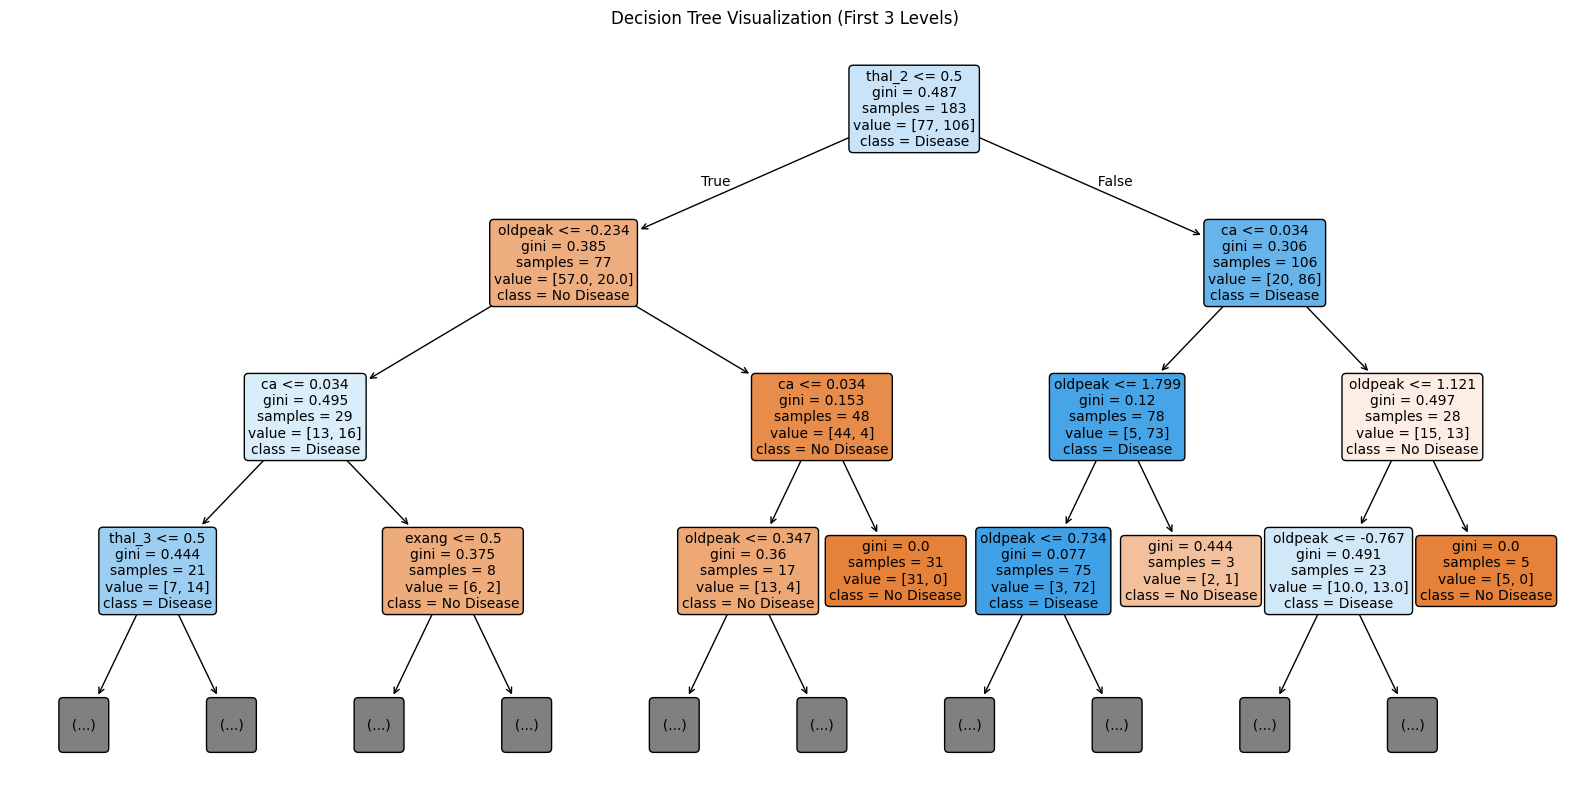


✓ Decision Tree model saved as 'decision_tree_model.pkl'


In [3]:


# IT24104335 - Decision Tree Model
from google.colab import files
uploaded = files.upload()

# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, cross_val_score
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                           roc_auc_score, confusion_matrix, ConfusionMatrixDisplay,
                           classification_report, roc_curve)
from sklearn.tree import DecisionTreeClassifier, plot_tree
import warnings
warnings.filterwarnings('ignore')

# Loading the preprocessed dataset
df = pd.read_csv("heart_selected_features_final.csv")

# Preparing features and target
X = df.drop("target", axis=1)
y = df["target"]

print("Dataset shape:", X.shape)
print("Class distribution:\n", y.value_counts())

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])

# Define consistent CV strategy
CV_STRATEGY = 5
cv = StratifiedKFold(n_splits=CV_STRATEGY, shuffle=True, random_state=42)

# Hyperparameter tuning for Decision Tree
print("\n=== Decision Tree Hyperparameter Tuning ===")
param_grid_dt = {
    "max_depth": [3, 5, 7, 10, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "criterion": ['gini', 'entropy']
}

grid_dt = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_grid=param_grid_dt,
    scoring="f1",
    cv=CV_STRATEGY,
    n_jobs=-1,
    verbose=1
)

grid_dt.fit(X_train, y_train)
print("Best Parameters for Decision Tree:", grid_dt.best_params_)
print("Best CV Score (F1):", grid_dt.best_score_)

# Getting the tuned model
dt_model = grid_dt.best_estimator_

# Test set evaluation
y_pred_dt = dt_model.predict(X_test)
y_proba_dt = dt_model.predict_proba(X_test)[:, 1]

print("\n=== Decision Tree Performance (Test Set) ===")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Precision:", precision_score(y_test, y_pred_dt))
print("Recall:", recall_score(y_test, y_pred_dt))
print("F1 Score:", f1_score(y_test, y_pred_dt))
print("ROC AUC:", roc_auc_score(y_test, y_proba_dt))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt, target_names=['No Disease', 'Disease']))

# Confusion Matrix
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_dt),
                       display_labels=['No Disease', 'Disease']).plot(cmap="Blues")
plt.title("Decision Tree Confusion Matrix (Tuned)")
plt.show()

# ROC Curve
plt.figure(figsize=(8, 6))
fpr, tpr, _ = roc_curve(y_test, y_proba_dt)
plt.plot(fpr, tpr, linewidth=2, label=f"Decision Tree (AUC = {roc_auc_score(y_test, y_proba_dt):.4f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Decision Tree')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# Feature Importance
plt.figure(figsize=(12, 6))
importances = dt_model.feature_importances_
feature_names = X.columns
sorted_idx = np.argsort(importances)[::-1]

plt.bar(range(len(importances)), importances[sorted_idx])
plt.xticks(range(len(importances)), [feature_names[i] for i in sorted_idx], rotation=45)
plt.title("Decision Tree - Feature Importances")
plt.ylabel("Importance Score")
plt.tight_layout()
plt.show()

print("\nTop 5 Most Important Features:")
for i in range(min(5, len(importances))):
    print(f"  {feature_names[sorted_idx[i]]}: {importances[sorted_idx[i]]:.4f}")

# Proper Cross-Validation
print("\n=== Proper Cross-Validation ===")
dt_fresh = DecisionTreeClassifier(random_state=42, **grid_dt.best_params_)
dt_cv_scores = cross_val_score(dt_fresh, X_train, y_train, cv=cv, scoring="f1")

print("Decision Tree CV F1 Scores:", dt_cv_scores.round(4))
print("Decision Tree Mean CV F1:", dt_cv_scores.mean().round(4), "+/-", (dt_cv_scores.std() * 2).round(4))

# Overfitting analysis
train_pred = dt_model.predict(X_train)
test_pred = y_pred_dt

train_accuracy = accuracy_score(y_train, train_pred)
test_accuracy = accuracy_score(y_test, test_pred)
accuracy_gap = abs(train_accuracy - test_accuracy)

print(f"\nOverfitting Analysis:")
print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy:  {test_accuracy:.4f}")
print(f"Accuracy Gap:   {accuracy_gap:.4f}")

if accuracy_gap > 0.05:
    print("--- POTENTIAL OVERFITTING ---")
else:
    print("--- GOOD GENERALIZATION ---")

# Visualize the decision tree (pruned for readability)
plt.figure(figsize=(20, 10))
plot_tree(dt_model,
          feature_names=X.columns,
          class_names=['No Disease', 'Disease'],
          filled=True,
          rounded=True,
          max_depth=3,  # Limit depth for readability
          fontsize=10)
plt.title("Decision Tree Visualization (First 3 Levels)")
plt.show()

# Save the model
import joblib
joblib.dump(dt_model, 'decision_tree_model.pkl')
print("\n✓ Decision Tree model saved as 'decision_tree_model.pkl'")